In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('bank-additional-full.csv',sep=';')
print(df.columns.values)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


In [67]:
df['conversion'] =  df['y'].apply(lambda x: 1 if x=='yes' else 0)

In [68]:
df['age_group'] = df['age'].apply(
    lambda x: '(18-30]' if x<30 else '(30-40]' if x<40 else '(40-50]' if x<50 else '(50-60]' if x<60 else '(60-70]' if x<70 else '70+'

)

In [69]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'conversion',
       'age_group'], dtype=object)

In [70]:
conversions_by_marital_status_df = pd.pivot_table(df, values='conversion', index='marital', columns='y', aggfunc=len)

In [71]:
conversions_by_marital_status_df.head()

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


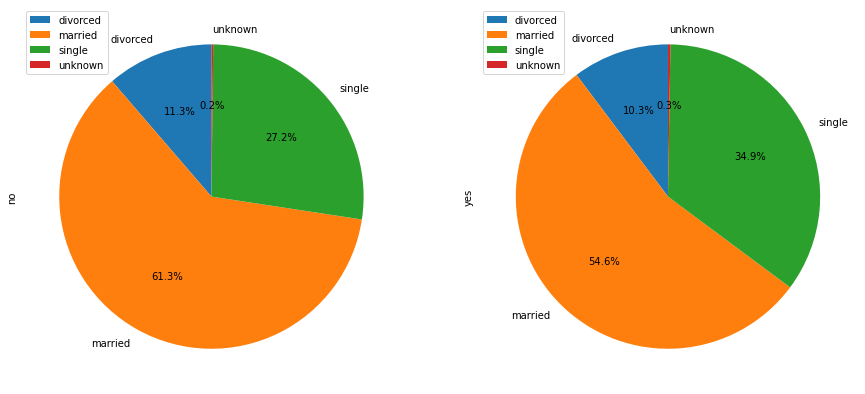

In [72]:
conversions_by_marital_status_df.plot(
kind='pie',
figsize=(15, 7),
startangle=90,
subplots=True,
autopct=lambda x: '%0.1f%%' % x
)
plt.show()

In [73]:
age_marital_df = df.groupby(by=['age_group','marital'])['conversion'].sum().unstack(1).fillna(0).divide(
    df.groupby(by='age_group')['conversion'].count(), axis =0

)

In [74]:
age_marital_df.head(10)

marital,divorced,married,single,unknown
age_group,,,,
(18-30],0.002117,0.027871,0.132475,0.000176
(30-40],0.007557,0.052958,0.040383,0.000354
(40-50],0.011970,0.054627,0.012350,0.000285
(50-60],0.017342,0.077674,0.006412,0.000146
(60-70],0.037293,0.301105,0.006906,0.001381
70+,0.136461,0.321962,0.012793,0.000000


In [75]:
df.groupby(by='age_group')['conversion'].count()

age_group
(18-30]     5669
(30-40]    16938
(40-50]    10526
(50-60]     6862
(60-70]      724
70+          469
Name: conversion, dtype: int64

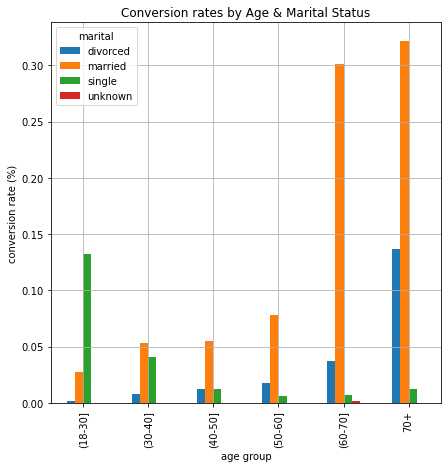

In [76]:
gropus = ['(18-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '70+']

ax = age_marital_df.reindex(gropus).plot(

    kind='bar',
    grid=True,
    figsize=(7,7)
    )
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()


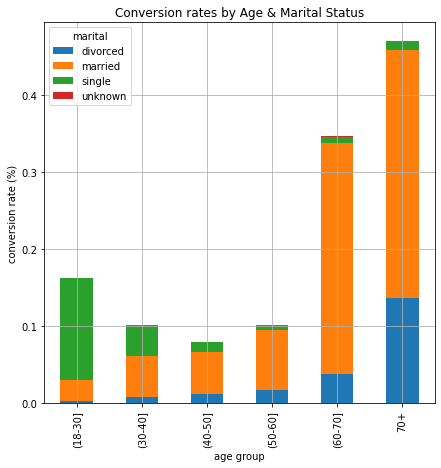

In [78]:
ax = age_marital_df.reindex(gropus).plot(

    kind='bar',
    stacked = True,
    grid=True,
    figsize=(7,7)
    )
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()